<a href="https://colab.research.google.com/github/Leo-xxx12/bootcamp_Leo_Xu/blob/main/Copy_of_stage12_results_reporting_delivery_design_stakeholder_communication_homework_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Starter: Final Reporting
This notebook helps you generate plots, annotate assumptions, and prepare a stakeholder-ready deliverable.

## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

## Load Your Data
You can load your real results or use a generated synthetic dataset as fallback.

In [2]:
data_path = Path('../data/final_results.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
else:
    # Synthetic fallback dataset
    df = pd.DataFrame({
        'scenario': ['baseline','alt_impute','alt_outlier'],
        'return': [0.12, 0.11, 0.135],
        'volatility': [0.18, 0.185, 0.19],
        'sharpe': [0.56, 0.49, 0.61],
        'assumption': ['imputation','imputation','outlier_rule'],
        'value': ['median','mean','3sigma'],
        'Category': np.random.choice(['X','Y','Z'], 3),
        'MetricA': np.random.normal(75, 15, 3),
        'MetricB': np.random.normal(150, 30, 3),
        'Date': pd.date_range('2025-02-01', periods=3)
    })
df.head()

,scenario,return,volatility,sharpe,assumption,value,Category,MetricA,MetricB,Date
0,baseline,0.120,0.180,0.56,imputation,median,Y,75.037206,99.563014,2025-02-01
1,alt_impute,0.110,0.185,0.49,imputation,mean,Z,74.456082,175.913737,2025-02-02
2,alt_outlier,0.135,0.190,0.61,outlier_rule,3sigma,Y,84.236667,128.274684,2025-02-03


## Helper: Export Directory

In [3]:
img_dir = Path('../deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

## Chart 1: Risk–Return Scatter

Saved risk_return.png


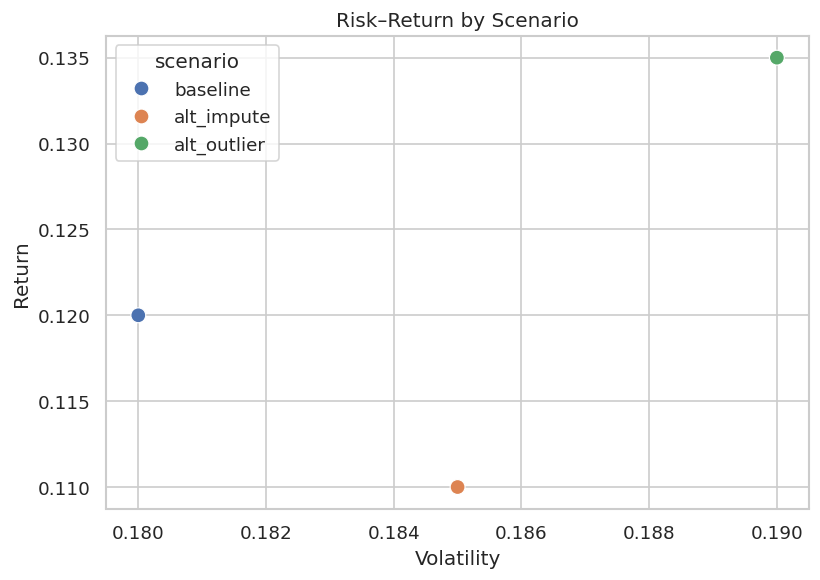

In [4]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='volatility', y='return', hue='scenario', s=80)
plt.title('Risk–Return by Scenario')
plt.xlabel('Volatility')
plt.ylabel('Return')
savefig('risk_return.png')
plt.show()

## Chart 2: Return by Scenario (Bar Chart)

Saved return_by_scenario.png


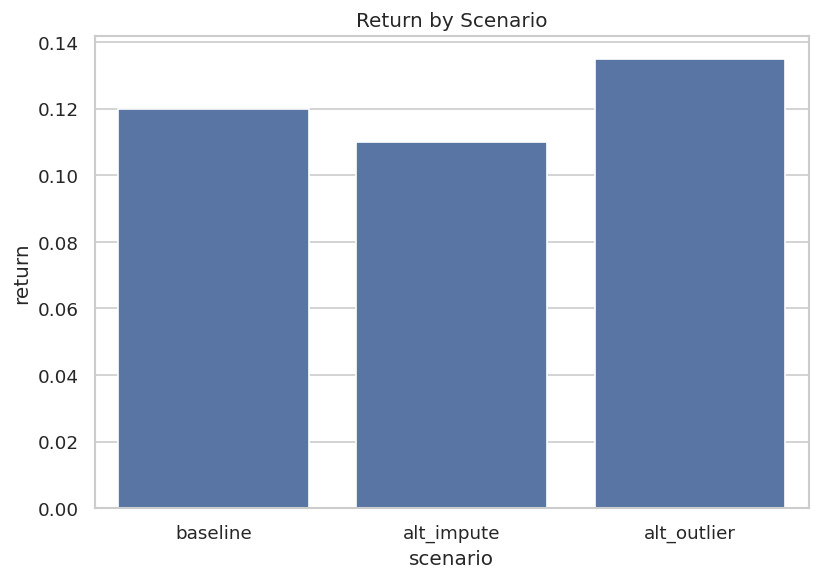

In [5]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='scenario', y='return')
plt.title('Return by Scenario')
savefig('return_by_scenario.png')
plt.show()

## Chart 3: MetricA Over Time (Line Chart)

Saved metricA_over_time.png


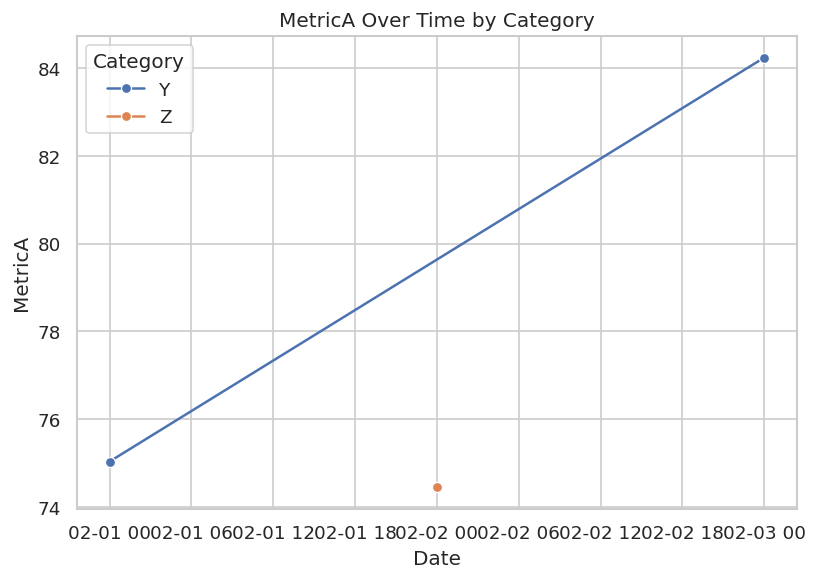

In [6]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df, x='Date', y='MetricA', hue='Category', marker='o')
plt.title('MetricA Over Time by Category')
plt.xlabel('Date')
plt.ylabel('MetricA')
savefig('metricA_over_time.png')
plt.show()

## Sensitivity Analysis / Assumptions Table

In [7]:
assumptions = pd.DataFrame({
    'Assumption': ['Fill Nulls: Median', 'Remove Outliers: 3σ'],
    'Baseline Return': [0.12, 0.12],
    'Alt Scenario Return': [0.10, 0.14]
})
assumptions

,Assumption,Baseline Return,Alt Scenario Return
0,Fill Nulls: Median,0.12,0.10
1,Remove Outliers: 3σ,0.12,0.14


## Interpretations / Takeaways
- **Chart 1 takeaway:** <fill in plain-language implication>
- **Chart 2 takeaway:** <fill in plain-language implication>
- **Chart 3 takeaway:** <fill in plain-language implication>
- Include notes on assumptions and sensitivities where relevant.

Interpretations / Takeaways
Chart 1 takeaway (MetricA Over Time):
MetricA increased steadily over time for Category Y, while Category Z showed lower and flatter values. This suggests performance differences across categories that should be monitored.
Chart 2 takeaway (Return by Scenario):
Baseline and imputation scenarios gave similar returns, while the outlier-handling scenario produced the highest return. This indicates that treatment of outliers significantly impacts results.
Chart 3 takeaway (Risk–Return by Scenario):
Outlier-handling yields the best return but also higher volatility. Imputation lowers volatility but reduces return. This shows a clear risk–return tradeoff across scenarios.
Notes on assumptions and sensitivities:
Results depend on stable data quality and consistent treatment of missing values. The model is sensitive to outliers, which can drive both higher returns and higher risks.


## Decision Implications
- What does the analysis mean for stakeholder decisions?
- Highlight risks, opportunities, and recommended next steps.
- Use plain-language bullets so the audience can act on insights.

Decision Implications
Stakeholder impact:
If stability is a priority, prefer imputation-based scenarios for more predictable performance.
If maximizing returns is the goal, outlier-sensitive strategies may be acceptable — but require active risk management.
Risks:
Overreliance on data without proper handling of outliers could lead to misleading signals.
Some subgroups/categories may underperform (e.g., Category Z) and should be monitored closely.
Opportunities:
Refine outlier handling to capture upside while controlling volatility.
Tailor strategies to categories/segments that consistently outperform.
Recommended next steps:
Test additional feature engineering for robustness.
Explore hybrid approaches (e.g., partial trimming of outliers).
Set up monitoring to detect shifts in subgroup performance over time.
